In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/thisismetis/chi17_ds1/master/challenges/challenges_data/2013_movies.csv?token=AUYNYkI1KeR3tjPot1LaSkfwDhEaOXAvks5YnjohwA%3D%3D'
df = pd.read_csv(url)

# Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [26]:
df['ones'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
ones                  100 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


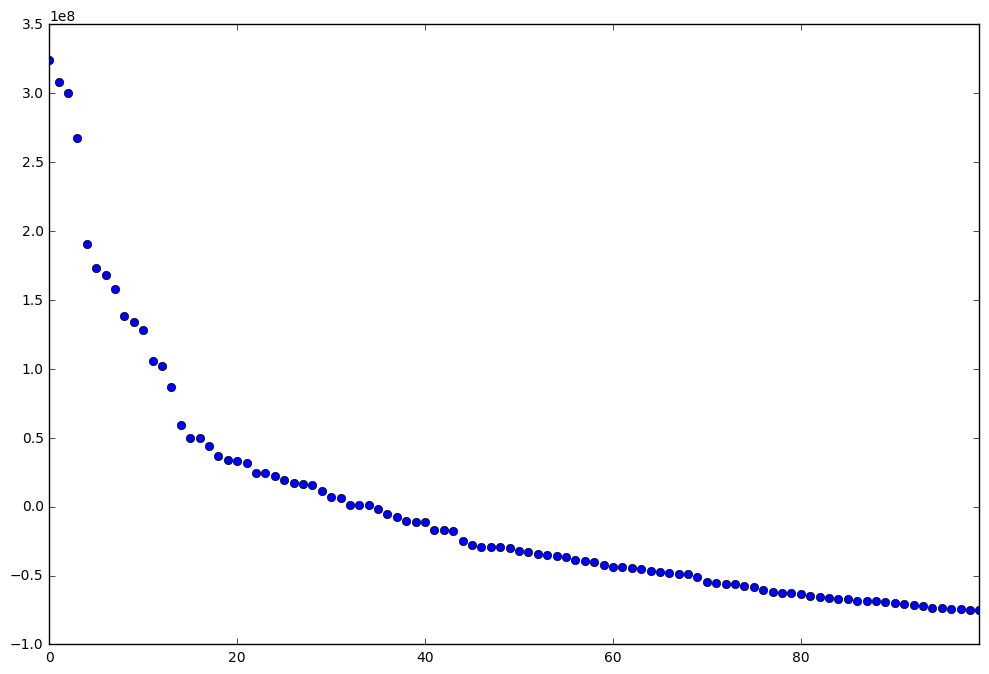

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

y, X = patsy.dmatrices('DomesticTotalGross ~ ones', data=df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.resid.plot(style='o', figsize=(12,8))


##This model predicts in a way that is no better than just taking the average of the dataset

# Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

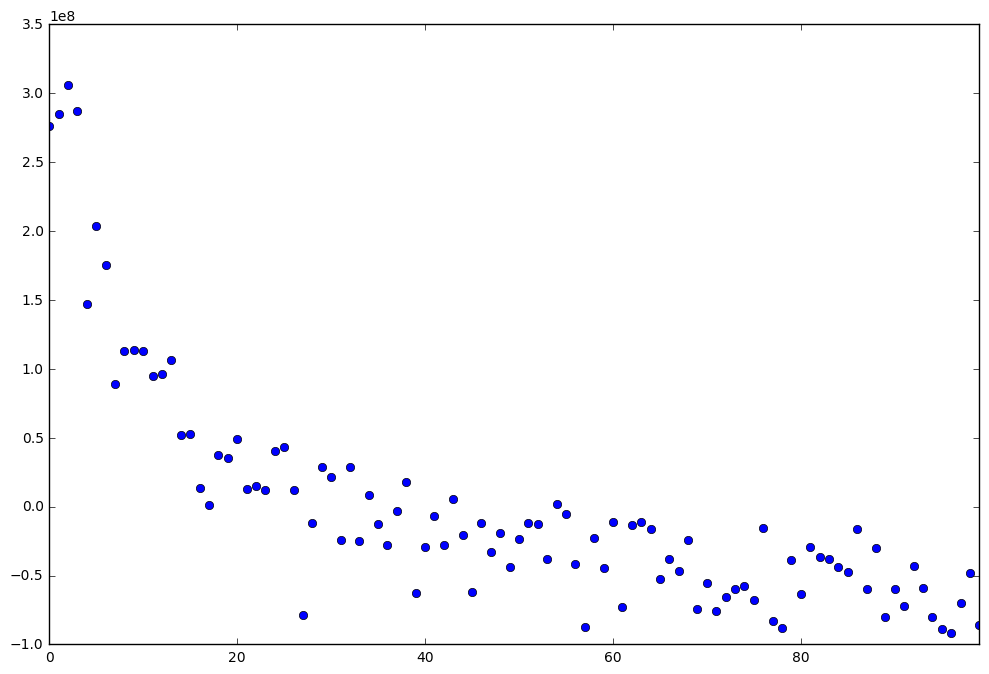

In [59]:
yt, Xt = patsy.dmatrices('DomesticTotalGross ~ ones + Runtime', data=df, return_type="dataframe")
model = sm.OLS(yt, Xt)
fit = model.fit()
fit.resid.plot(style='o', figsize=(12,8))

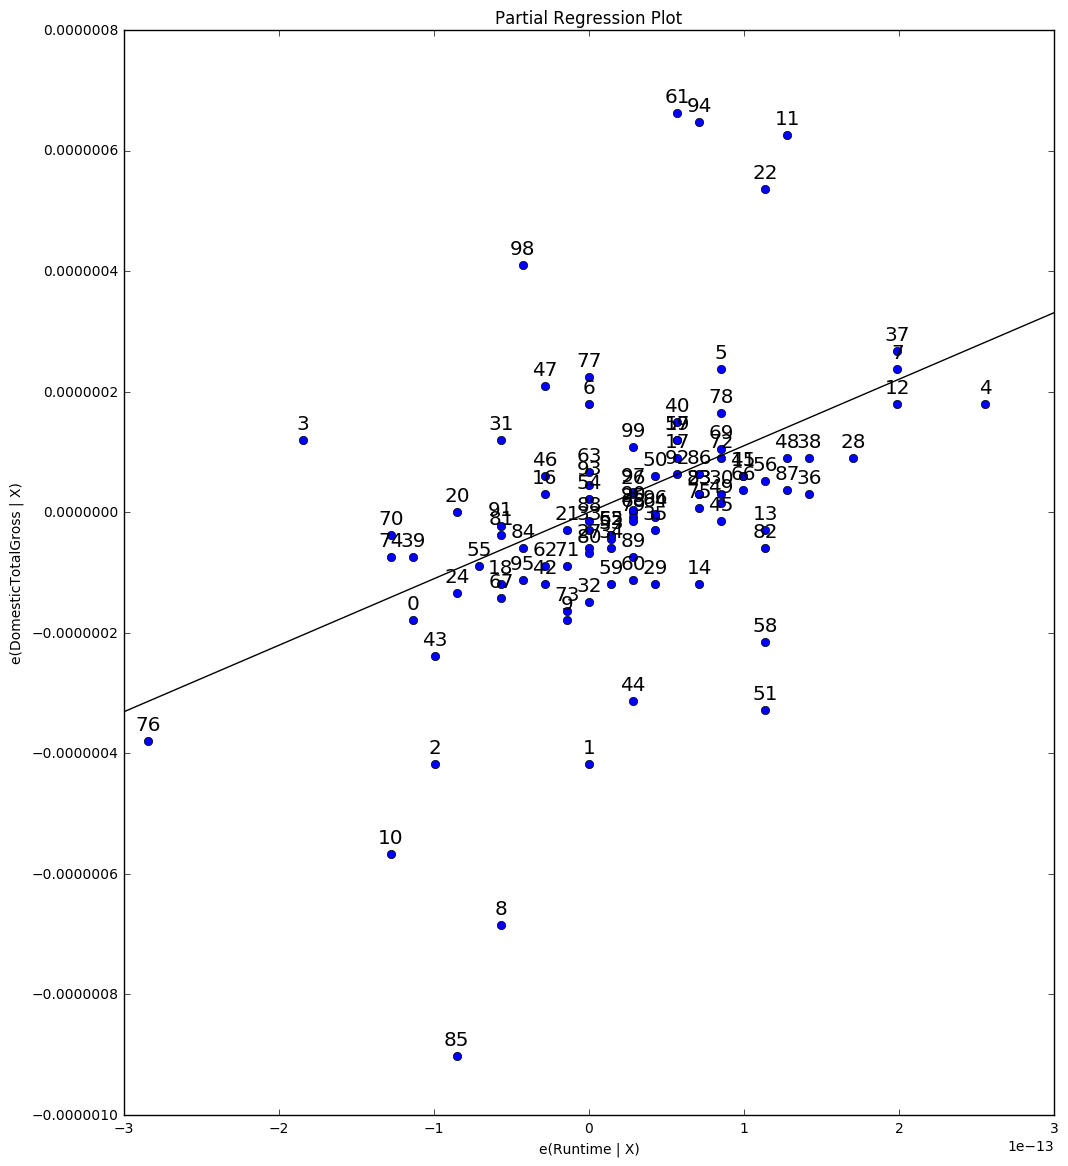

In [42]:
fix, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress("DomesticTotalGross", "Runtime", ["Title"], data=df, ax=ax)

# Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [57]:

X=patsy.dmatrix('Director',data=df,return_type='dataframe')
X['dtg'] = df['DomesticTotalGross']
X['ones'] = 1

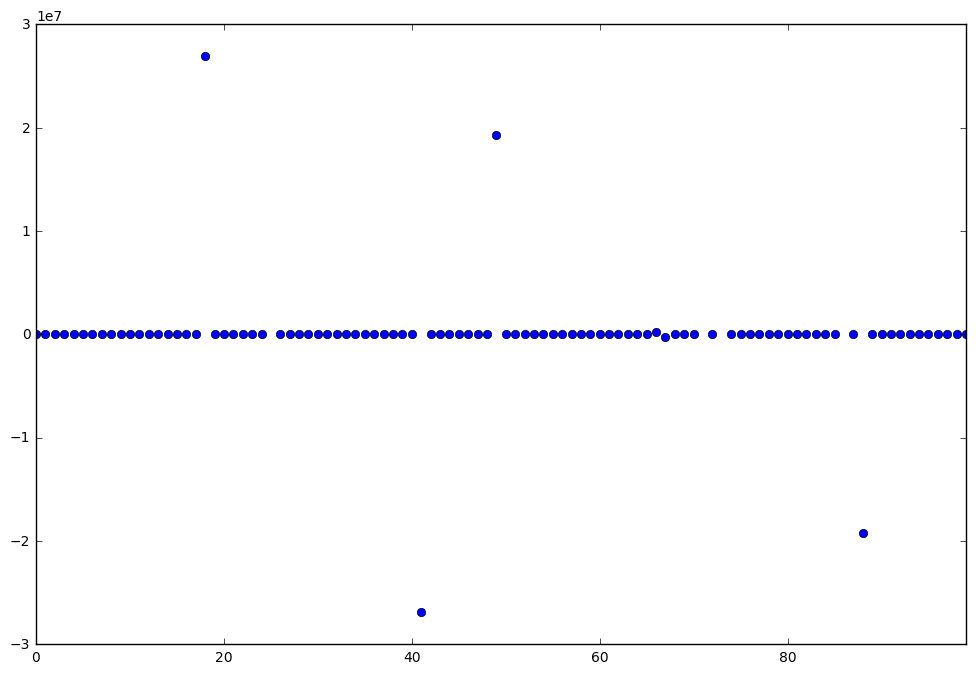

In [58]:
import statsmodels.api as sm

y = X.dtg
x=X.drop(['dtg'],1)

lsm = sm.OLS(y,x)
fit4 = lsm.fit()
fit4.resid.plot(style='o', figsize=(12,8))

# Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [61]:

# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.25)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.10327306688598591